***Climbing the Ladder: How Gender, Education, and Seniority Shape Pay in the Workplace***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind, f_oneway, chi2_contingency
import statsmodels.api as sm

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Glassdoor Gender Pay Gap.csv to Glassdoor Gender Pay Gap.csv


In [ ]:
ladder_df = pd.read_csv('Glassdoor Gender Pay Gap.csv')
ladder_df.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


In [ ]:
print(f'Dataset contains {ladder_df.shape[0]} rows and {ladder_df.shape[1]} columns \n')
ladder_df.info()
ladder_df.describe(include='all').T

Dataset contains 1000 rows and 9 columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   1000 non-null   object
 1   Gender     1000 non-null   object
 2   Age        1000 non-null   int64 
 3   PerfEval   1000 non-null   int64 
 4   Education  1000 non-null   object
 5   Dept       1000 non-null   object
 6   Seniority  1000 non-null   int64 
 7   BasePay    1000 non-null   int64 
 8   Bonus      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
JobTitle,1000,10,Marketing Associate,118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,1000,2,Male,532,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1000.0,NaN,NaN,NaN,41.393,14.294856,18.0,29.0,41.0,54.25,65.0
PerfEval,1000.0,NaN,NaN,NaN,3.037,1.423959,1.0,2.0,3.0,4.0,5.0
Education,1000,4,High School,265,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dept,1000,5,Operations,210,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seniority,1000.0,NaN,NaN,NaN,2.971,1.395029,1.0,2.0,3.0,4.0,5.0
BasePay,1000.0,NaN,NaN,NaN,94472.653,25337.493272,34208.0,76850.25,93327.5,111558.0,179726.0
Bonus,1000.0,NaN,NaN,NaN,6467.161,2004.377365,1703.0,4849.5,6507.0,8026.0,11293.0


In [ ]:
#Check NULL values
print(f'Null values: {ladder_df.isnull().sum()}')

Null values: JobTitle     0
Gender       0
Age          0
PerfEval     0
Education    0
Dept         0
Seniority    0
BasePay      0
Bonus        0
dtype: int64


In [ ]:
#Check Duplicate Rows
print(f'Duplicate rows: {ladder_df.duplicated().sum()}')

Duplicate rows: 0


**Categorical Variables**

In [ ]:
#Check Categorical Variables
for col in ladder_df.select_dtypes('object'):
    print(col, ladder_df[col].unique())

JobTitle ['Graphic Designer' 'Software Engineer' 'Warehouse Associate' 'IT'
 'Sales Associate' 'Driver' 'Financial Analyst' 'Marketing Associate'
 'Data Scientist' 'Manager']
Gender ['Female' 'Male']
Education ['College' 'PhD' 'Masters' 'High School']
Dept ['Operations' 'Management' 'Administration' 'Sales' 'Engineering']


--- Education is Ordinal, can do ordinal encoding later for better analysis ---


**Continuous Variables**

*Descriptive Statistics*

In [ ]:
# print("\nDescriptive Statistics:\n")
print(ladder_df[['BasePay', 'Bonus', 'Seniority', 'PerfEval']].describe())

             BasePay         Bonus    Seniority     PerfEval
count    1000.000000   1000.000000  1000.000000  1000.000000
mean    94472.653000   6467.161000     2.971000     3.037000
std     25337.493272   2004.377365     1.395029     1.423959
min     34208.000000   1703.000000     1.000000     1.000000
25%     76850.250000   4849.500000     2.000000     2.000000
50%     93327.500000   6507.000000     3.000000     3.000000
75%    111558.000000   8026.000000     4.000000     4.000000
max    179726.000000  11293.000000     5.000000     5.000000



Distribution of Continuous Variables:



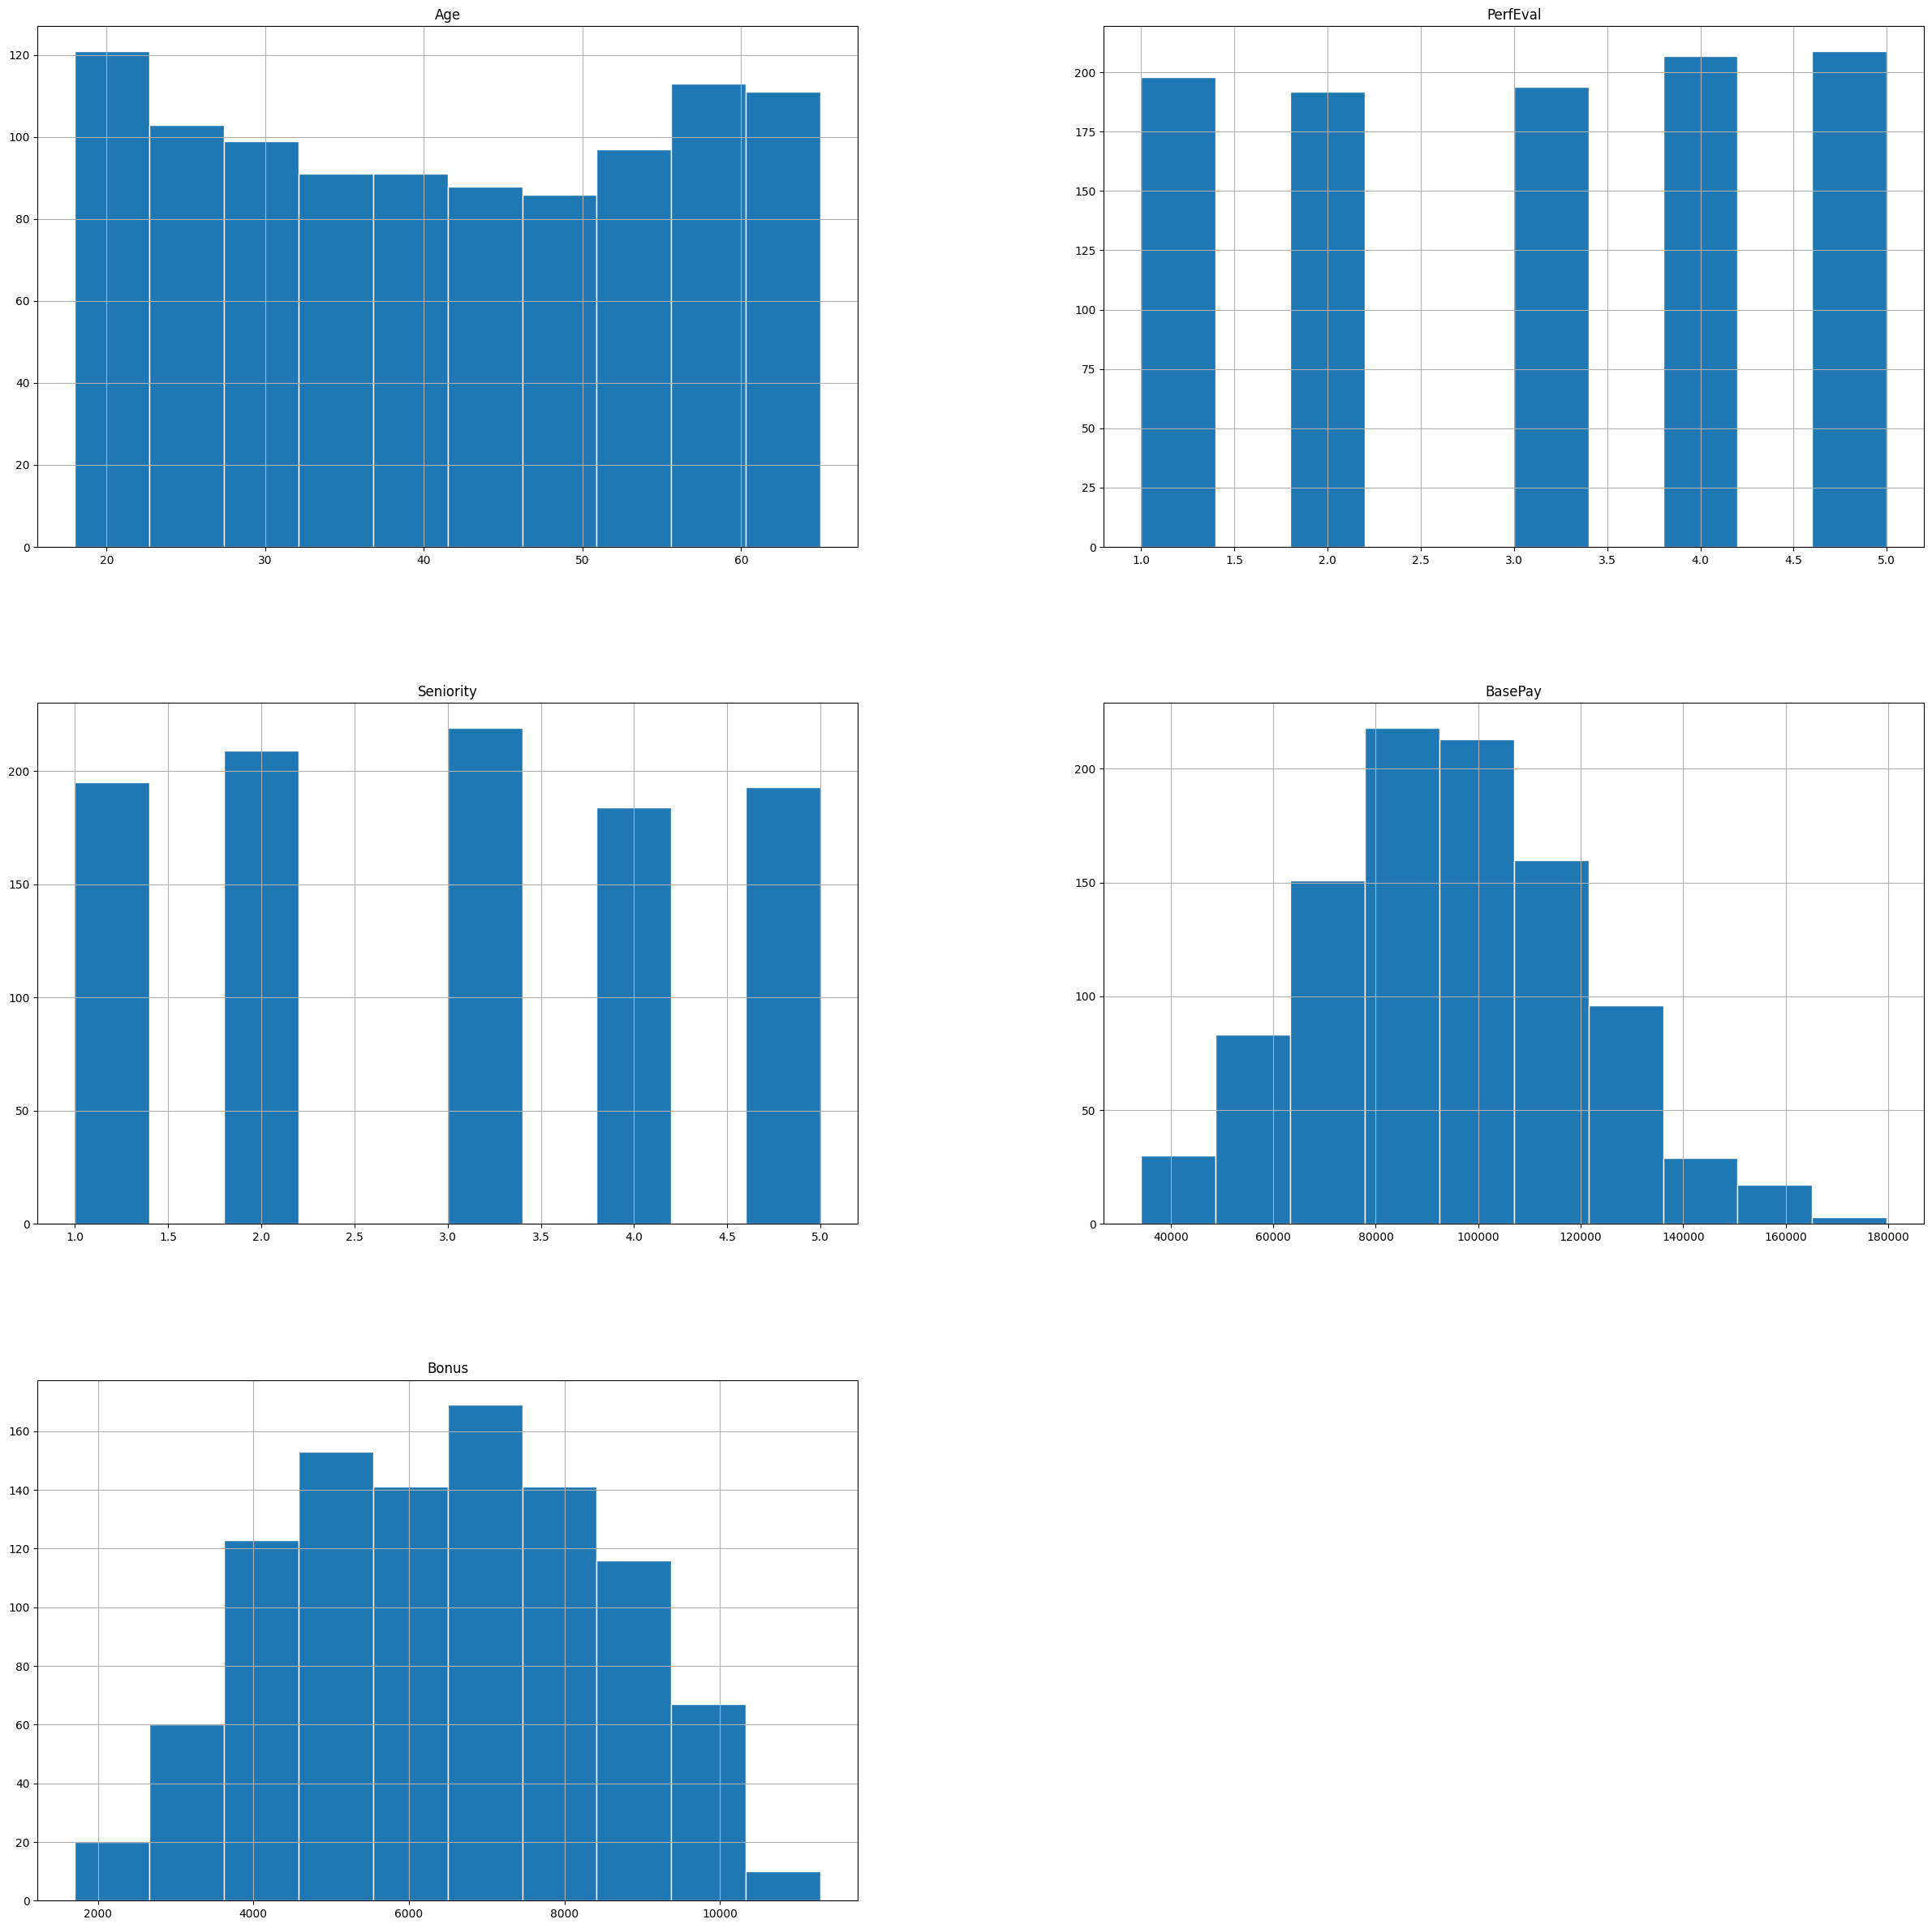

In [ ]:
print("\nDistribution of Continuous Variables:\n")
ladder_df.hist(figsize=(30,30), edgecolor='white')
plt.show()

**Distribution of Base Pay**

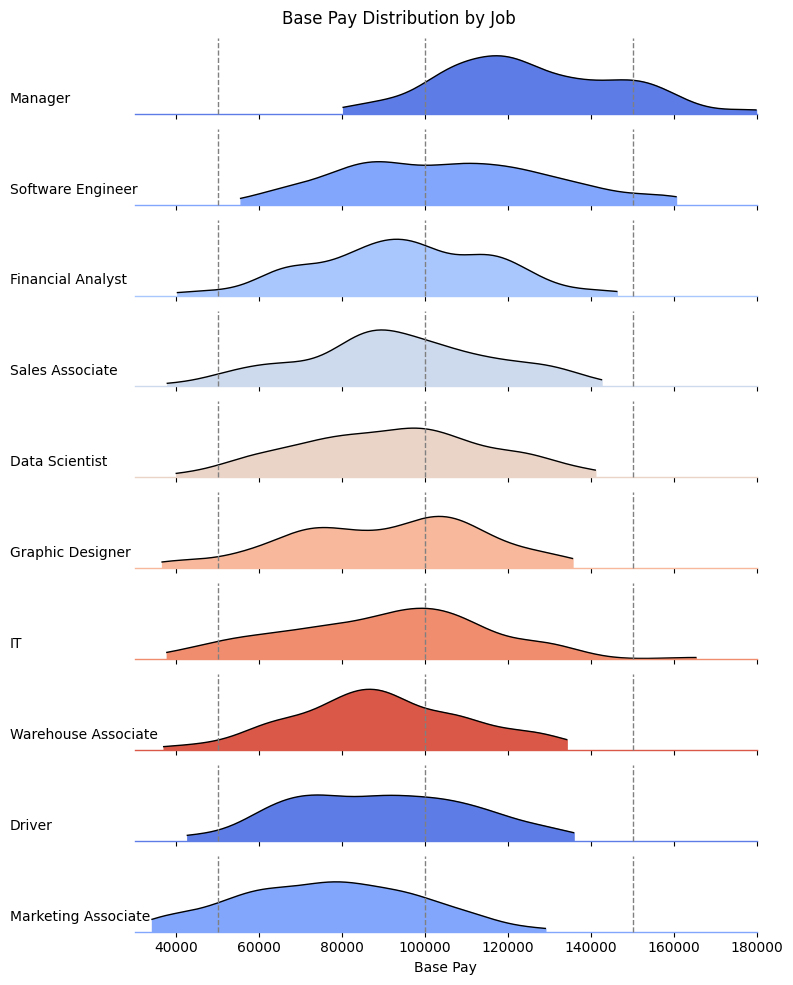

In [ ]:
# KDEplot of Base Pay by Job Title
## can be useful to add in STD
## will need cosmetics adjusment if we're including this in the infographics

# generate basepay mean for each job title
job_mean_serie = ladder_df.groupby('JobTitle')['BasePay'].mean()
ladder_df['job_meanpay'] = ladder_df['JobTitle'].map(job_mean_serie)

# sort the Job by the income mean
ladder_df = ladder_df.sort_values(by="job_meanpay", ascending=False)

# generate a color palette
pal = sns.color_palette(palette='coolwarm', n_colors=len('JobTitle'))

# generate a FacetGrid
grid = sns.FacetGrid(ladder_df, row='JobTitle', hue='JobTitle', aspect=8, height=1, palette=pal, xlim=(30000, 180000), ylim=(0, 0.000025))

# add kdeplots for each Job Title
grid.map(sns.kdeplot, 'BasePay', bw_adjust=0.8, clip_on=True, fill=True, alpha=1, linewidth=1, cut=0)

# add blackline as contour for each kdeplot
grid.map(sns.kdeplot, 'BasePay', bw_adjust=0.8, clip_on=True, color='black', lw=1, cut=0)

# add horizontal lines for each kdeplot
grid.refline(y=0, linewidth=1, linestyle='-', color=None, clip_on=False)

# add vertical reference lines
for x_value in [50000, 100000, 150000]:
    grid.refline(x=x_value, linewidth=1, linestyle='--', color='gray', clip_on=False)

def label(job, color, label):
    ax = plt.gca()
    ax.text(-0.2, 0.2, label, fontweight=8, color='black',
            ha="left", va="center", transform=ax.transAxes)

grid.map(label, 'JobTitle')

# get the subplots to overlap
grid.fig.subplots_adjust(hspace=-0.4)

# remove axes titles, yticks and spines
grid.set_titles('')
grid.set(yticks=[], ylabel="")
grid.despine(bottom=True, left=True)

plt.xlabel('Base Pay', fontweight=12, fontsize=10)
grid.fig.suptitle('Base Pay Distribution by Job',
               ha='center',
               fontsize=12,
               fontweight=12)

plt.tight_layout()
plt.show()

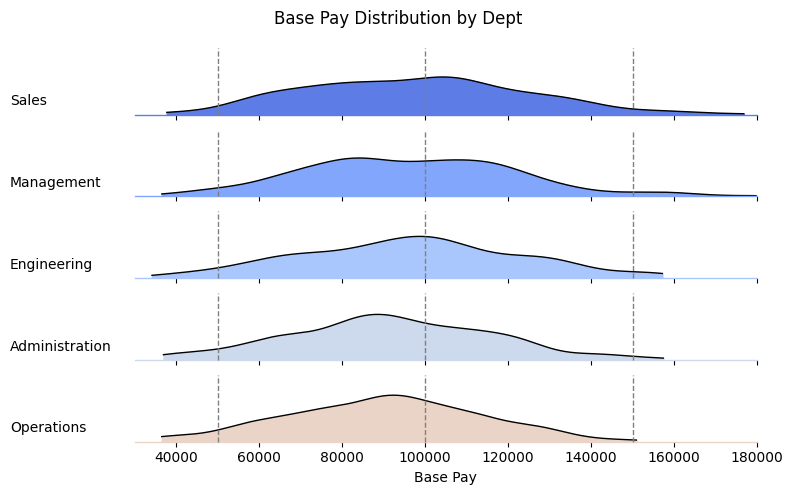

In [ ]:
# KDEplot of Base Pay by Dept
## can be useful to add in STD

# generate basepay mean for each Dept
dept_mean_serie = ladder_df.groupby('Dept')['BasePay'].mean()
ladder_df['dept_meanpay'] = ladder_df['Dept'].map(dept_mean_serie)

# sort the Job by the income mean
ladder_df = ladder_df.sort_values(by="dept_meanpay", ascending=False)

# generate a color palette
pal2 = sns.color_palette(palette='coolwarm', n_colors=len('Dept'))

# generate a FacetGrid
grid2 = sns.FacetGrid(ladder_df, row='Dept', hue='Dept', aspect=8, height=1, palette=pal, xlim=(30000, 180000), ylim=(0, 0.000025))

# add kdeplots for each Dept
grid2.map(sns.kdeplot, 'BasePay', bw_adjust=0.8, clip_on=True, fill=True, alpha=1, linewidth=1, cut=0)

# add blackline as contour for each kdeplot
grid2.map(sns.kdeplot, 'BasePay', bw_adjust=0.8, clip_on=True, color='black', lw=1, cut=0)

# add horizontal lines for each kdeplot
grid2.refline(y=0, linewidth=1, linestyle='-', color=None, clip_on=False)

# add vertical reference lines
for x_value in [50000, 100000, 150000]:
    grid2.refline(x=x_value, linewidth=1, linestyle='--', color='gray', clip_on=False)

def label2(job, color, label):
    ax = plt.gca()
    ax.text(-0.2, 0.2, label, fontweight=8, color='black',
            ha="left", va="center", transform=ax.transAxes)

grid2.map(label2, 'Dept')

# get the subplots to overlap
grid2.fig.subplots_adjust(hspace=-0.4)

# remove axes titles, yticks and spines
grid2.set_titles('')
grid2.set(yticks=[], ylabel="")
grid2.despine(bottom=True, left=True)

plt.xlabel('Base Pay', fontweight=12, fontsize=10)
grid2.fig.suptitle('Base Pay Distribution by Dept',
               ha='center',
               fontsize=12,
               fontweight=12)

plt.tight_layout()
plt.show()

**Gender Pay Gap**


T-Test Gender Pay Gap: T=5.38, p=9.479e-08



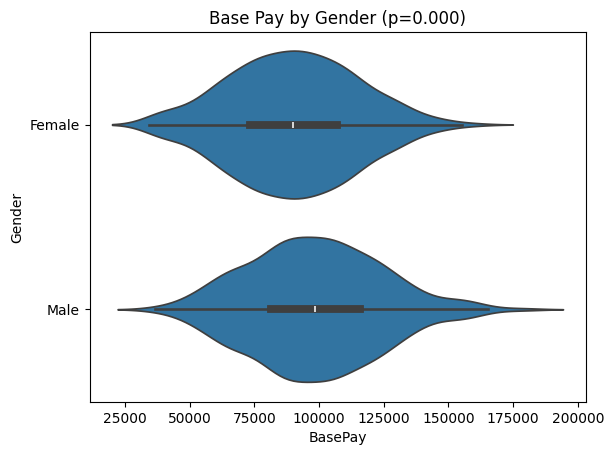

In [ ]:
# Average Base Pay by Gender

male_pay = ladder_df[ladder_df['Gender'] == 'Male']['BasePay']
female_pay = ladder_df[ladder_df['Gender'] == 'Female']['BasePay']
t_stat, p_val = ttest_ind(male_pay, female_pay)
print(f"\nT-Test Gender Pay Gap: T={t_stat:.2f}, p={p_val:.3e}\n")

sns.violinplot(x='BasePay', y='Gender', data=ladder_df)
plt.title(f'Base Pay by Gender (p={p_val:.3f})')
plt.show()

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Sales'),
  Text(1, 0, 'Management'),
  Text(2, 0, 'Engineering'),
  Text(3, 0, 'Administration'),
  Text(4, 0, 'Operations')])

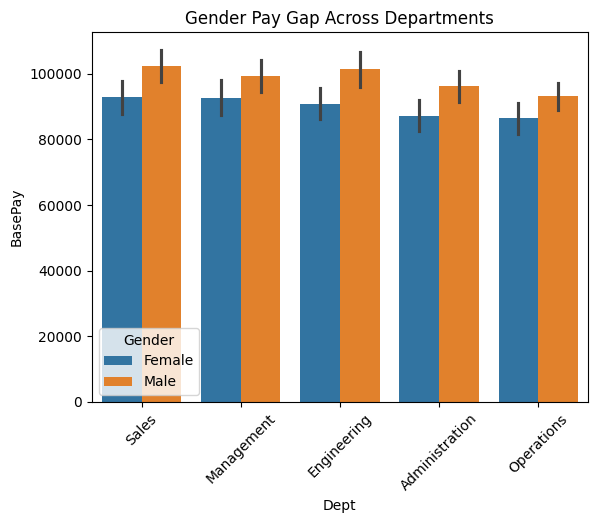

In [ ]:
# Gender Pay Gap Across Departments

sns.barplot(data=ladder_df, x='Dept', y='BasePay', hue='Gender')
plt.title('Gender Pay Gap Across Departments')
plt.xticks(rotation=45)

**Education Level Impact**

In [ ]:
#sort
ladder_df[['Education', 'BasePay']].groupby(['Education'], as_index=False).mean().sort_values(by='BasePay', ascending=True)

,Education,BasePay
1,High School,88732.298113
0,College,92126.597510
2,Masters,97595.542969
3,PhD,99880.777311



ANOVA for Education Levels: F=10.42, p=9.391e-07



<ipython-input-16-6a56dc71dd82>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=ladder_df, x='BasePay', y='Education', order=['High School','College','Masters','PhD'], palette='Set2', dodge=True)


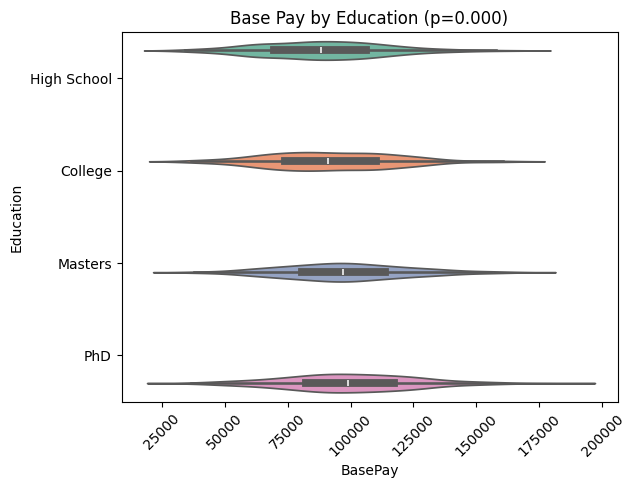

In [ ]:
# Base Pay by Education

groups = [group['BasePay'].values for name, group in ladder_df.groupby('Education')]
f_stat, p_val = f_oneway(*groups)
print(f"\nANOVA for Education Levels: F={f_stat:.2f}, p={p_val:.3e}\n")

sns.violinplot(data=ladder_df, x='BasePay', y='Education', order=['High School','College','Masters','PhD'], palette='Set2', dodge=True)
plt.title(f'Base Pay by Education (p={p_val:.3f})')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Calculate the average base salary by gender
avg_salary_by_gender = ladder_df.groupby('Gender')['BasePay'].mean()

# Get the average salary values for male and female
male_salary = avg_salary_by_gender.get('Male', 0)
female_salary = avg_salary_by_gender.get('Female', 0)

# Calculate the average difference in base salary (male - female)
average_difference_value = male_salary - female_salary

# Calculate the percentage difference (how much lower female salary is compared to male)
if male_salary != 0:
    percent_difference = ((male_salary - female_salary) / male_salary) * 100
else:
    percent_difference = None

# Print results
print("Average base salary by gender:")
print(avg_salary_by_gender)

print(f"\nAverage base salary difference (Male - Female): ${average_difference_value:.2f}")
print(f"\nPercentage difference (female vs male): {percent_difference:.2f}%")

Average base salary by gender:
Gender
Female    89942.818376
Male      98457.545113
Name: BasePay, dtype: float64

Average base salary difference (Male - Female): $8514.73

Percentage difference (female vs male): 8.65%


In [ ]:

# Define the correct education order
education_order = ['High School', 'College', 'Masters', 'PhD']

# Step 1: Group by Education and compute average base pay
avg_base_pay = ladder_df.groupby('Education')['BasePay'].mean()

# Step 2: Reorder based on education level
avg_base_pay_ordered = avg_base_pay.reindex(education_order)

# Step 3: Compute percentage increase using pct_change()
pct_increase = avg_base_pay_ordered.pct_change() * 100  # multiply by 100 to get percentage

# Step 4: Combine into a DataFrame
result = pd.DataFrame({
    'AverageBasePay (USD)': avg_base_pay_ordered,
    'PercentIncreaseFromPreviousLevel': pct_increase.fillna(0).map(lambda x: f"{x:.2f}%")
})

# Display result
print(result)

             AverageBasePay (USD) PercentIncreaseFromPreviousLevel
Education                                                         
High School          88732.298113                            0.00%
College              92126.597510                            3.83%
Masters              97595.542969                            5.94%
PhD                  99880.777311                            2.34%


<ipython-input-17-a5cbbd9c14c6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=ladder_df, x='Education', y='BasePay', split=True, palette='muted')


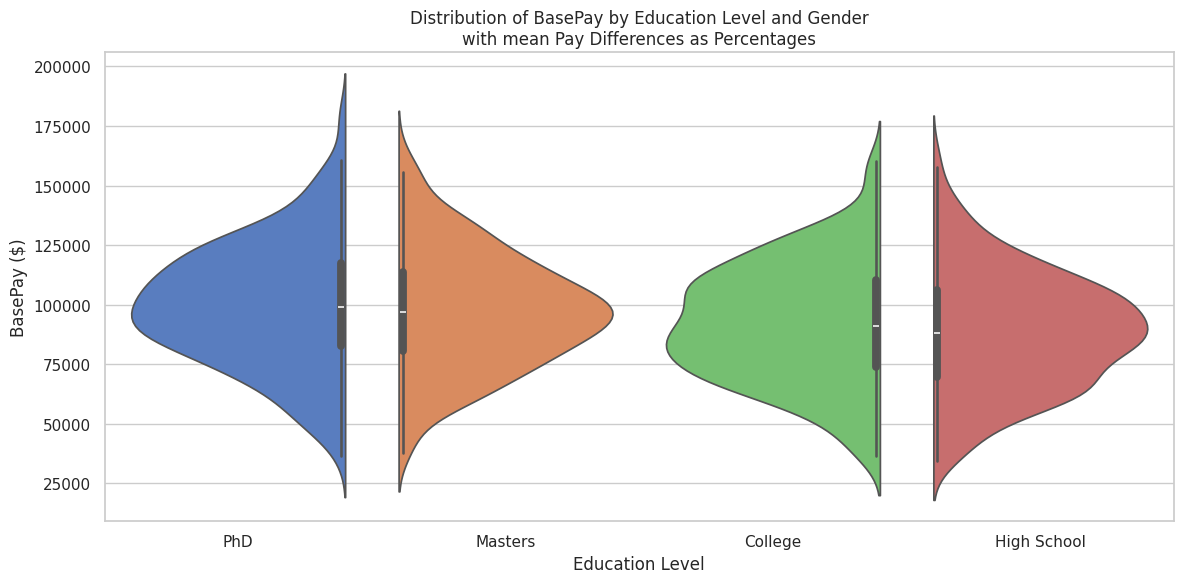

In [ ]:
# Set the visual style
# education_order = ['High School', 'College', 'Masters', 'PhD']
sns.set(style="whitegrid")

# Create the violin plot
plt.figure(figsize=(12, 6))
ax = sns.violinplot(data=ladder_df, x='Education', y='BasePay', split=True, palette='muted')

# Calculate and annotate the mean BasePay for each Education-Gender group
means = ladder_df.groupby(['Education', 'Gender'])['BasePay'].mean().reset_index()

# Add percentage labels relative to overall mean
overall_mean = ladder_df['BasePay'].mean()
for i, row in means.iterrows():
    education = row['Education']
    mean_pay = row['BasePay']
    pct = ((mean_pay - overall_mean) / overall_mean) * 100

    # Find x-position of education label
    #x = sorted(ladder_df['Education'].unique()).index(education)
    #offset = -0.2 if gender == 'Male' else 0.2  # slight horizontal offset by gender
    #ax.text(x + offset, mean_pay, f"{pct:+.1f}%", color='white', ha='center', va='center', fontsize=13, fontweight='bold')

# Customize the plot
plt.title('Distribution of BasePay by Education Level and Gender\nwith mean Pay Differences as Percentages')
plt.xlabel('Education Level')
plt.ylabel('BasePay ($)')
#plt.legend(title='Gender', loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


(array([0, 1, 2, 3]),
 [Text(0, 0, 'High School'),
  Text(1, 0, 'College'),
  Text(2, 0, 'Masters'),
  Text(3, 0, 'PhD')])

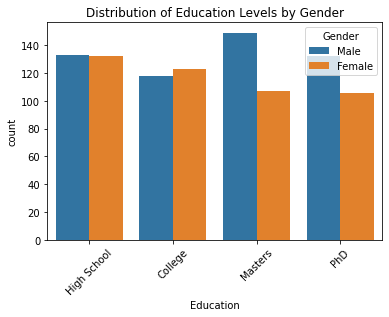

In [ ]:
# Education Level by Gender
## can include some summary statistics (e.g. how likely it is for male to be more educated than female)

sns.countplot(data=ladder_df, x='Education', hue='Gender', order=['High School','College','Masters','PhD'])
plt.title('Distribution of Education Levels by Gender')
plt.xticks(rotation=45)

**Seniority & Pay Growth**

Text(0.5, 1.0, 'Seniority vs. Base Pay by Gender')

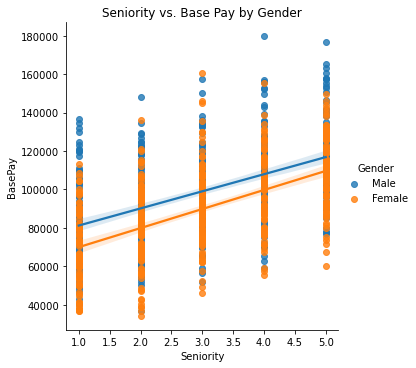

In [ ]:
# Seniority VS Base Pay

sns.lmplot(data=ladder_df, x='Seniority', y='BasePay', hue='Gender')
plt.title('Seniority vs. Base Pay by Gender')

Text(0.5, 1.0, 'Pay Growth Over Seniority by Gender')

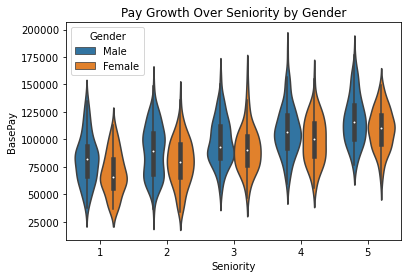

In [ ]:
# Seniority VS Base Pay

#sns.lineplot(data=ladder_df, x='Seniority', y='BasePay', hue='Gender')
#plt.title('Seniority vs. Base Pay by Gender')


sns.violinplot(data=ladder_df, x='Seniority', y='BasePay', hue='Gender', style='Gender')
plt.title('Pay Growth Over Seniority by Gender')

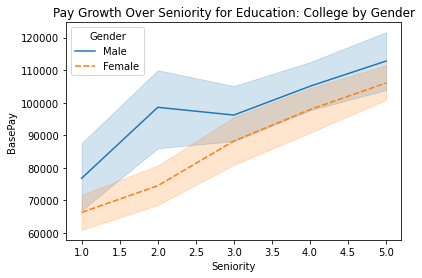

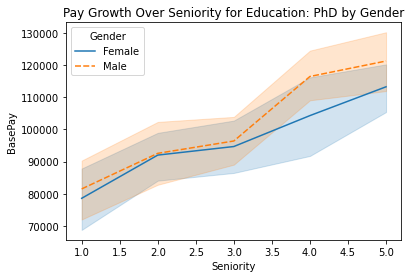

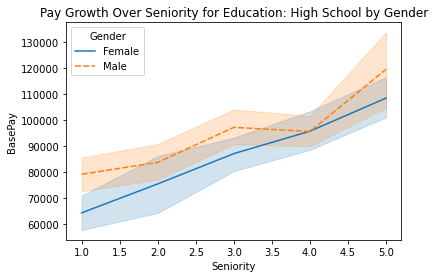

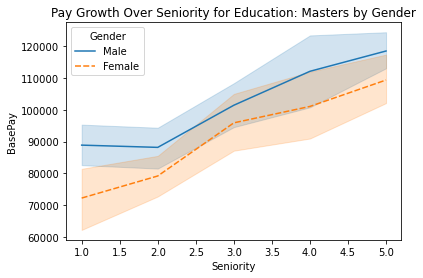

In [ ]:
# Pay Growth by Education & Gender
##too messy to be informative  --can remove or simplify--

#sns.lineplot(data=ladder_df, x='Seniority', y='BasePay', hue='Education', style='Gender')
#plt.title('Pay Growth Over Seniority by Education & Gender')


lst = ladder_df['Education'].unique()
for ls in lst:
    df1 = ladder_df[ladder_df['Education'] == ls]
    sns.lineplot(data=df1, x='Seniority', y='BasePay', hue='Gender', style='Gender')
    plt.title(f'Pay Growth Over Seniority for Education: {ls} by Gender')
    plt.show()


**Performance Evaluation vs Pay**

Text(0.5, 1.0, 'Performance Evaluation vs Bonus')

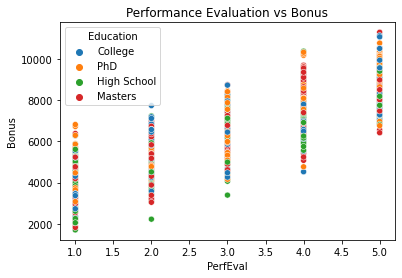

In [ ]:
# Performance Evaluation vs Bonus
## can decide on hue (Education or Gender)
### can specify/group by job title to be more accurate i.e. comparing apples to apples

sns.scatterplot(data=ladder_df, x='PerfEval', y='Bonus', hue='Education')
plt.title('Performance Evaluation vs Bonus')

Text(0.5, 1.0, 'Avg Bonus by Performance Eval & Education Level')

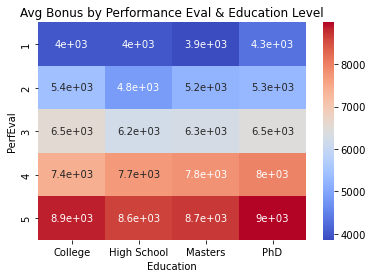

In [ ]:
# Performance + Pay Heatmap
## education level is not yet sorted

pivot = ladder_df.pivot_table(index='PerfEval', columns='Education', values='Bonus', aggfunc='mean')
sns.heatmap(pivot, annot=True, cmap='coolwarm')
plt.title('Avg Bonus by Performance Eval & Education Level')

**Multivariate Salary Influences**

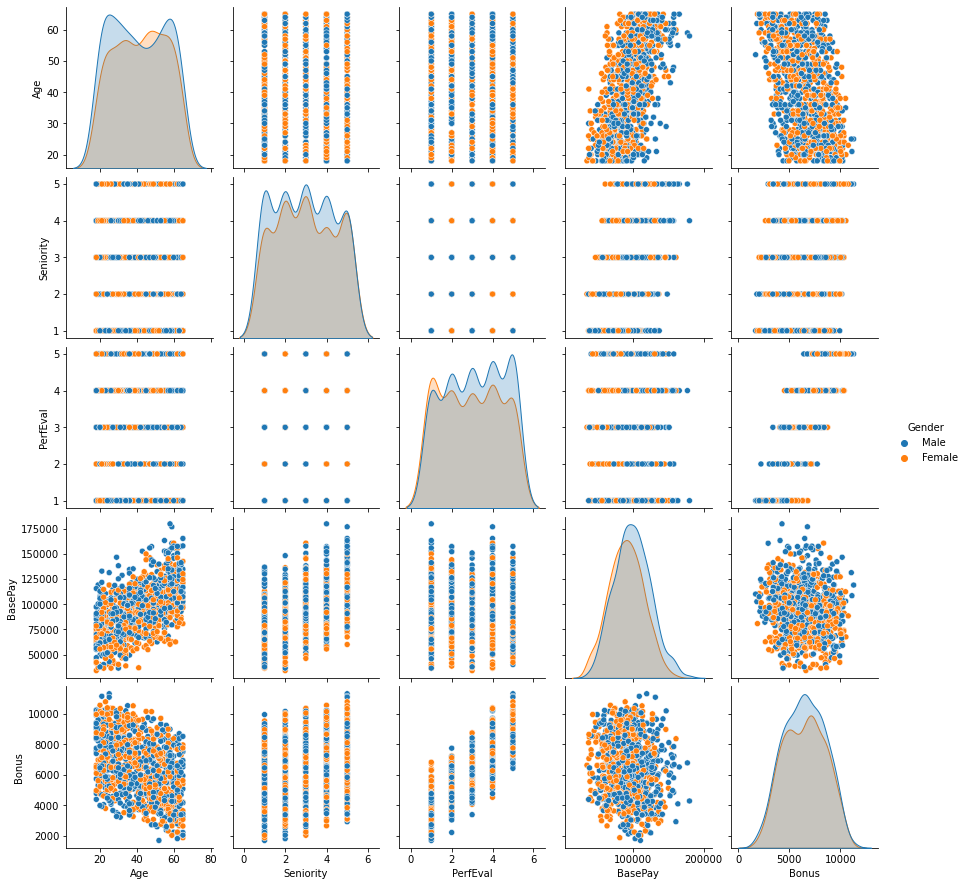

In [ ]:
# Pairplot of Key Variables
## might take a HUGE space in infographics
### better to comprehend and select a specific informative pairplot to include in infographic

sns.pairplot(ladder_df, vars=['Age', 'Seniority', 'PerfEval', 'BasePay', 'Bonus'], hue='Gender')

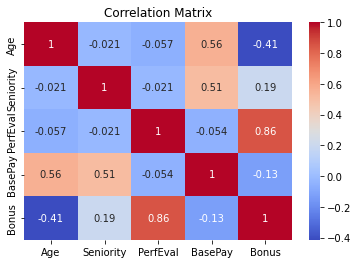

In [ ]:
# Correlation Matrix
## informative but might take sometime to explain
### consider to do ordinal encoding for Education and include in the Correlation Matrix

corr = ladder_df[['Age', 'Seniority', 'PerfEval', 'BasePay', 'Bonus']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Regression Model
# Optional: encode categorical variables

X = ladder_df[['Seniority', 'PerfEval', 'Age']]
X = sm.add_constant(X)
y = ladder_df['BasePay']

model = sm.OLS(y, X).fit()
print("\nRegression Summary:\n")
print(model.summary())


Regression Summary:

                            OLS Regression Results                            
Dep. Variable:                BasePay   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     478.8
Date:                Sat, 10 May 2025   Prob (F-statistic):          1.52e-192
Time:                        12:17:20   Log-Likelihood:                -11112.
No. Observations:                1000   AIC:                         2.223e+04
Df Residuals:                     996   BIC:                         2.225e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.472e+04   2281.2

--- need more statistical tests ---